 # Table of Contents
<div class="toc" style="margin-top: 1em;"><ul class="toc-item" id="toc-level0"><li><span><a href="http://localhost:8888/notebooks/hwsol01.ipynb#Question-:-Univariate-Linear-Regression" data-toc-modified-id="Question-:-Univariate-Linear-Regression-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Question : Univariate Linear Regression</a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/hwsol01.ipynb#Answer-to-Qn1" data-toc-modified-id="Answer-to-Qn1-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Answer to Qn1</a></span></li></ul></li><li><span><a href="http://localhost:8888/notebooks/hwsol01.ipynb#Question-:-Multivariate-Linear-Regression" data-toc-modified-id="Question-:-Multivariate-Linear-Regression-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Question : Multivariate Linear Regression</a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/hwsol01.ipynb#Answer-to-Question-2:" data-toc-modified-id="Answer-to-Question-2:-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Answer to Question 2:</a></span></li></ul></li><li><span><a href="http://localhost:8888/notebooks/hwsol01.ipynb#Question:-Polynomial-Regression" data-toc-modified-id="Question:-Polynomial-Regression-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Question: Polynomial Regression</a></span></li></ul></div>

In [3]:
from IPython.display import display, Image, IFrame, Math, Latex
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Question : Univariate Linear Regression
[Univariate Regression, 20 points]
Train a univariate linear regression model to predict house prices 
as a function of their floor size, based on the solution to the 
system with 2 linear equations discussed in class. 
Use the dataset from the folder hw01/data/univariate. 
Python3 skeleton code is provided in univariate.py. 
After training print the parameters and report the RMSE and 
the objective function values on the training and test data. 
Plot the training using the default blue circles and test examples 
using lime green triangles. On the same graph also plot the 
linear approximation.

## Answer to Qn1

In this question we are given the dataset of Athens house price 
accoding to thier floor size. We have to fit the univarite linear
regression to the given data.

The train dataset contains two columns:

| Floor size       | Price           | 
| ------------- |-------------| 
| 3032     | 52500 |  
| 2078      | 230000   |
| 50 samples | 50 prices|

We have to fit the linear regression to the given data. For this we solve system
o two linear equations:
    
\begin{eqnarray}
    w_0N + w_1 \sum_{n=1}^N x_n = \sum_{n=1}^N t_n \\
    w_0 \sum_{n=1}^N x_n + w_1 \sum_{n=1}^N x_n^2 = \sum_{n=1}^N t_nx_n
\end{eqnarray}

Solving these two equations for w0 and w1 we got:
$
    w1 = (sum\_t * sum\_x - N * sum\_tx) / (sum\_x * sum\_x - N * sum\_xx)\\
    w0 = (sum\_t - w1 * sum_x) / N
$

Then the required best fit is:
\begin{eqnarray}
t = w0 + w1 * x
\end{eqnarray}

Params Univariate:  [-15682.27021631    115.41845202] 

##################################################
Univariate Regression
E_rms_train Univariate: 6.41e+04
J_train Univariate: 2.05e+09


E_rms_test Univariate: 6.58e+04
J_test Univariate: 2.16e+09


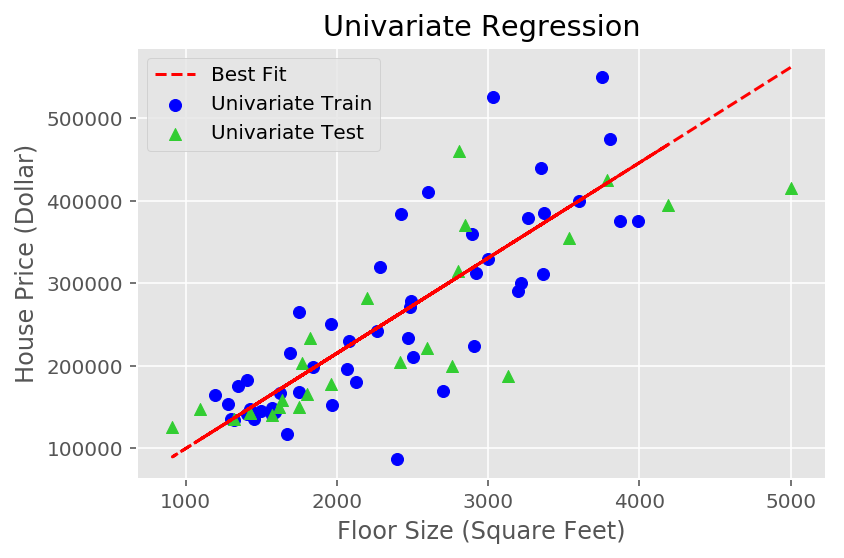



Begin time:  Mon Sep 25 17:35:22 2017
End   time:  Mon Sep 25 17:35:23 2017 

Time taken:  0 days,  0 hours,       0 minutes,  0.287056 seconds.


In [14]:
# %load univariate.py
#!python
"""
:Title: Univariate Linear Regression.

@author: Bhishan Poudel

@date: Sep 22, 2017

@email: bhishanpdl@gmail.com

The cost function is given by

.. math::

  J(w) = \\frac{1}{2N} \sum_{n=1}^N (h(x_n,w) - t_n)^2

Minimizing the cost function w.r.t. w gives two system of liner equations:

.. math::

    w_0N + w_1 \sum_{n=1}^N x_n = \sum_{n=1}^N t_n \\\\\\\\
    w_0 \sum_{n=1}^N x_n + w_1 \sum_{n=1}^N x_n^2 = \sum_{n=1}^N t_nx_n

We solve these normal equations and find the values w0 and w1.
"""
# Imports
import argparse
import sys
import numpy as np
from matplotlib import pyplot as plt
import numpy.polynomial.polynomial as poly

# checking
# import statsmodels.api as sm # sm 0.8.0 gives FutureWarning




def read_data(infile):
    """Read the datafile and return arrays"""
    data = np.genfromtxt(infile, delimiter=None,dtype=int)
    X = data[:,0].reshape(len(data),1)
    t = data[:,-1].reshape(len(data),1)

    return [X, t]


#
def train(X, t):
    """Implement univariate linear regression to compute w = [w0, w1].

    I solve system of linear equations from lecture 01

    w0 N      + w1 sum_x  = sum_t

    w0 sum_x  + w1 sum_xx = sum_tx

    """

    # Use system of equations
    N = len(t)
    sum_x = sum(X)
    sum_t = sum(t)

    sum_xx = sum(X*X)
    sum_tx = sum(X*t)

    w1 = (sum_t * sum_x - N * sum_tx) / (sum_x * sum_x - N * sum_xx)
    w0 = (sum_t - w1 * sum_x) / N

#     w = np.array([w0[0], w1[0]])
    w = np.array([w0, w1])


    # checking values using statsmodel library
    # w = sm.OLS(t,sm.add_constant(X)).fit().params
    # [-15682.27021631    115.41845202]

    # params w
    # print('y-intercept bias term w0 = {:.2f}'.format(w[0][0]))
    # print('weight term           w1 = {:.2f}'.format(w[1][0]))

    # plt.scatter(X,t)
    # plt.plot(X, X*w[1] + w[0])
    # plt.show()


    return w


def compute_rmse(X,t,w):
    """Compute RMSE on dataset (X, t).

    Note: cost function J is 1/2 of mean squared error.
    RMSE is square root of mean squared error.

    """
    h = X*w[1] + w[0]
    rmse = np.sqrt(np.mean(( h - t )**2) )

    # debug
    # print('w[0] =', w[0])
    # print('w[1] =', w[1])


    # rmse = np.sqrt(((np.dot(X,w.T)- t)**2).mean())

    return rmse


#
def compute_cost(X, t, w):
    """Compute objective function on dataset (X, t)."""
    h = X*w[1] + w[0]
    J = 1/2 *  np.mean(( h - t )**2)
    return J

def univariate_reg(fh_train, fh_test):
    # Read the training and test data.
    Xtrain, ttrain = read_data(fh_train)
    Xtest, ttest = read_data(fh_test)


    # Train model on training examples.
    w = train(Xtrain, ttrain)

    # train
    E_rms_train_uni = compute_rmse(Xtrain, ttrain, w)
    J_train_uni = compute_cost(Xtrain, ttrain, w)

    # test
    E_rms_test_uni = compute_rmse(Xtest, ttest, w)
    J_test_uni = compute_cost(Xtest, ttest, w)

    return E_rms_train_uni, J_train_uni, E_rms_test_uni, J_test_uni


def myplot(fh_train,fh_test,w):
    # matplotlib customization
    plt.style.use('ggplot')
    fig, ax = plt.subplots()

    # data
    Xtrain, ttrain = read_data(fh_train)
    Xtest, ttest = read_data(fh_test)
    Xhyptest = Xtest * w[1] + w[0]


    # plot with label, title
    ax.scatter(Xtrain,ttrain,color='b',marker='o', label='Univariate Train')
    ax.scatter(Xtest,ttest,c='limegreen', marker='^', label='Univariate Test')
    ax.plot(Xtest,Xhyptest,'r--',label='Best Fit')

    # set xlabel and ylabel to AxisObject
    ax.set_xlabel('Floor Size (Square Feet)')
    ax.set_ylabel('House Price (Dollar)')
    ax.set_title('Univariate Regression')
    ax.legend()
    ax.grid(True)
    plt.tight_layout()
    plt.savefig('images/Univariate.png')
    plt.show()

##=======================================================================
## Main Program
##=======================================================================
def main():
    """Run main function."""
    parser = argparse.ArgumentParser('Univariate Exercise.')
    parser.add_argument('-i', '--input_data_dir',
                        type=str,
                        default='../data/univariate',
                        help='Directory for the univariate houses dataset.')
    FLAGS, unparsed = parser.parse_known_args()

    # Data file paths
    fh_train = FLAGS.input_data_dir + "/train.txt"
    fh_test  = FLAGS.input_data_dir + "/test.txt"

    # Print weight vector
    Xtrain, ttrain = read_data(fh_train)
    w = train(Xtrain, ttrain)
    print('Params Univariate: ', w, '\n')

    # Print RMSE and Cost
    E_rms_train_uni, J_train_uni, E_rms_test_uni, J_test_uni = univariate_reg(fh_train, fh_test)

    print("#"*50)
    print("Univariate Regression")

    # Print cost and RMSE on training data.
    print('E_rms_train Univariate: %0.2e' % E_rms_train_uni)
    print('J_train Univariate: %0.2e' % J_train_uni)

    # Print cost and RMSE on test data.
    print("\n")
    print('E_rms_test Univariate: %0.2e' % E_rms_test_uni)
    print('J_test Univariate: %0.2e' % J_test_uni)


    # Plotting
    myplot(fh_train, fh_test,w)




if __name__ == "__main__":
   import time

   # Beginning time
   program_begin_time = time.time()
   begin_ctime        = time.ctime()

   #  Run the main program
   main()


   # Print the time taken
   program_end_time = time.time()
   end_ctime        = time.ctime()
   seconds          = program_end_time - program_begin_time
   m, s             = divmod(seconds, 60)
   h, m             = divmod(m, 60)
   d, h             = divmod(h, 24)
   print("\n\nBegin time: ", begin_ctime)
   print("End   time: ", end_ctime, "\n")
   print("Time taken: {0: .0f} days, {1: .0f} hours, \
     {2: .0f} minutes, {3: f} seconds.".format(d, h, m, s))


# Question : Multivariate Linear Regression

 [Multivariate Regression, 20 points]
Train a univariate linear regression model to predict house prices as a function of
their floor size, number of bedrooms, and year. Use the normal equations discussed in
class, and evaluate on the dataset from the folder hw01/data/multivariate. Python3
skeleton code is provided in multivariate.py. After training print the parameters
and report the RMSE and the objective function values on the training and test data.
Compare the test RMSE with the one from the univariate case above.

## Answer to Question 2:
In this question the dataset contains multiple features such as floor size,
number of bedrooms and age of the house to give the price to house in Athens
Ohio.

| Floor size    | Number of Bedrooms | Age in Years  | Price   | 
| ------------- |--------------------| --------------| --------| 
| 3032          | 4                  | 25            | 52500   |  
| 2078          | 4                  | 23            |230000   |
| 2400          | 3                  | 11            |87000    |
| 50 samples    | 50 samples         | 50 samples    | 50 prices |


First we add the bias term as the column of ones as the first column in the data.
We call the last column (price) as the target vector (t) and rest of the data 
as design matrix X. The design matrix has shape = (50,4). First 3 rows of design matrix is given below.

|Bias | Floor size    | Number of Bedrooms | Age in Years  | 
|-----| ------------- |--------------------| --------------| 
|1    | 3032          | 4                  | 25            |  
|1    | 2078          | 4                  | 23            |
|1    | 2400          | 3                  | 11            |

We define the hypothesis as $h = X w^T$. This means the hypothesis of the first price is $h1 = w0 + w1 * x11 + w2 * x12 + w3 * x13$ and the target is $t1$.
We try to minimize the difference $h-t$ and choose a Ordinary Least Square (OLS)
method for this. This OLS is called Cost Function.

The cost function is
$$
J(w) = \frac{1}{2N} \sum_{n=1}^N (h(x_n,w) - t_n)^2
$$

Minimizing this cost function w.r.t. weight vector w, we get
$$
w = (X^T X)^{-1}  X^T t
$$

In [3]:
# %load multivariate.py
#!python
"""
:Title: Multivariate Linear Regression.

@author: Bhishan Poudel

@date: Sep 22, 2017

@email: bhishanpdl@gmail.com

The cost function is given by

.. math::

  J(w) = \\frac{1}{2N} \sum_{n=1}^N (h(x_n,w) - t_n)^2

Minimizing the cost function w.r.t. w gives the solution:

.. math::

  w = np.linalg.lstsq(X1,t)[0]
"""
# Imports
import argparse
import sys
import numpy as np
from matplotlib import pyplot as plt
import numpy.polynomial.polynomial as poly
from numpy.core.umath_tests import inner1d
from numpy.linalg import norm,lstsq,inv

# for univariate multivariate comparison
from univariate import univariate_reg

# checking
#


# Read data matrix X and labels t from text file.
def read_data(infile):
    """Read the datafile.

    Args:
      infile (str): path to datafile

    """
    # data = np.loadtxt(infile)
    data = np.genfromtxt(infile, delimiter=None, dtype=float)
    X = data[:, :-1]
    t = data[:, [-1]]
    return X, t


#----------------------------------------------------------------------#
#  function: train                                                     #
#----------------------------------------------------------------------#
# Here no. of features M = 3 (floor, bedrooms, age)
# Implement normal equations to compute w = [w0, w1, ..., w_M].
def train(X1, t):
    """Train the data and return the weights w.

    Args:

      X1 (array): Design matrix of size (m+1, n). I.e. There are
        m features and one bias column in the matrix X1.

      t (column): target column vector

    .. note::

       Here the design matrix X1 should have one extra bias term.

    .. warning::

       The operator @ requires python >= 3.5

    """
    # Method 1
    w = np.linalg.inv(X1.T.dot(X1)) .dot(X1.T) .dot(t)
    w = np.array(w).reshape(1, len(w)) # make 1d row array

    # Method 2
    # w = (inv(X1.T @ X1)) @ X1.T @ t
    # w = np.array(w).reshape(1, len(w)) # make 1d row array

    # Method 3
    # w = np.linalg.lstsq(X1,t)[0]
    # w = np.array(w).reshape(1, len(w)) # make 1d row array

    return w


# Compute RMSE on dataset (X, t).
def compute_rmse(X, t, w):
    """Compute the RMSE.

    RMSE is the root mean square error.

    .. math:: RMSE = \sqrt{\sum_{i=1}^{n}  \\frac{(h - t)^2}{n} }

    h is the hypothesis.

    :math:`h = X w^T`

    To find the norm of the residual matrix h-t we may use
    the code::

      # inner1d is the fastest subroutine.
      from numpy.core.umath_tests import inner1d
      np.sqrt(inner1d(h-t,h-t))

      # We can also use another method:
      ht_norm = np.linalg.norm(h - t)

    """

    # Method 1
    h = np.dot(X, w.T) # h = X @ w.T
    rmse = np.sqrt(((h - t) ** 2).mean())

    # Method 2
    # h = np.dot(X, w.T)
    # ht_norm = np.sqrt(inner1d(h-t,h-t))
    # rmse = ht_norm / np.sqrt(len(X))
    # rmse = rmse[0]

    # Method 3
    # norm is square root of sum of squares
    # rmse is norm/ sqrt(n)
    #
    # h = np.dot(X, w.T)
    # ht_norm = np.linalg.norm(h - t)
    # rmse = ht_norm / np.sqrt(len(X))

    # Checking
    # print("t.shape = ", t.shape)
    # print("w.shape = ", w.shape)
    # print("h.shape = ", h.shape)
    # print("X.shape = ", X.shape)
    # print("len(X1) = ", len(X))

    # Checking
    # rmse = 0.0
    # try:
    #     from sklearn.metrics import mean_squared_error
    #     rmse = mean_squared_error(h, t)**0.5
    #     rmse = np.sqrt(np.square(h - t).mean())
    # except:
    #     print('Error: The library sklearn not installed!')


    # Return RMSE
    return rmse

# Compute objective function (cost) on dataset (X, t).
def compute_cost(X, t, w):
    """Compute the cost function.

    .. math:: J = \\frac{1}{2n} \sum_{i=1}^{n}  \\frac{(h - t)^2}{n}

    """

    # Compute cost
    # N = float(len(t))
    # h = np.dot(X, w.T)   # h = X @ w.T
    # J = np.sum((h - t) ** 2) /2 / N

    # One liner
    J = np.sum((X @ w.T - t) ** 2) /2 / float(len(t))


    return J

def check_results(y_train, x1_train):
    """Multivariate Regression with statsmodels.api

    Args:
      y_train (float): target column vector of floats.
      x1_train (array): features+1 dimensional numpy array

    This fits the multivariate linear regression in four lines::

        import statsmodels.api as sm
        model = sm.OLS(y_train, x1_train)
        result = model.fit()
        print (result.summary())



    """
    try:
        import statsmodels.api as sm
        model = sm.OLS(y_train, x1_train)
        result = model.fit()
        print (result.summary())

    except:
        print('Error: statsmodels libray not found!')




##=======================================================================
## Main Program
##=======================================================================
def main():
    parser = argparse.ArgumentParser('Multivariate Exercise.')
    parser.add_argument('-i', '--input_data_dir',
                        type=str,
                        default='../data/multivariate',
                        help='Directory for the multivariate houses dataset.')
    FLAGS, unparsed = parser.parse_known_args()

    # Read the training and test data.
    Xtrain, ttrain = read_data(FLAGS.input_data_dir + "/train.txt")
    Xtest, ttest = read_data(FLAGS.input_data_dir + "/test.txt")

    #  Append ones to the first column
    X1train  = np.append(np.ones_like(ttrain), Xtrain, axis= 1)
    X1test  = np.append(np.ones_like(ttest), Xtest, axis= 1)

    # debug
    # print(" First column X1train[:, [0]] = \n{}".format(X1train[:, [0]]))
    # print(" First row X1train[0] = \n{}".format(X1train[0]))


    # Train model on training examples.
    w = train(X1train, ttrain)

    # Print model parameters.
    print("#"*50)
    print("Multivariate Regression")
    print('Params Mulitvariate: ', w[0], '\n')


    # Print cost and RMSE on training data.
    # train
    E_rms_train_multi = compute_rmse(X1train, ttrain, w)
    J_train_multi = compute_cost(X1train, ttrain, w)

    # test
    E_rms_test_multi = compute_rmse(X1test, ttest, w)
    J_test_multi = compute_cost(X1test, ttest,w)


    print('E_rms_train Multivariate: %0.2e' % E_rms_train_multi)
    print('J_train Multivariate: %0.2e' % J_train_multi)

    # Print cost and RMSE on test data.
    print("\n")
    print('E_rms_test Multivariate: %0.2e' % E_rms_test_multi)
    print('J_test Multivariate: %0.2e' % J_test_multi)

    #===========================================================
    print("\n")
    print("="*50)
    print("Comparison of Univariate and Multivariate")
    fh_train_uni = '../data/univariate/train.txt'
    fh_test_uni = '../data/univariate/test.txt'

    E_rms_train_uni, J_train_uni, E_rms_test_uni, J_test_uni = univariate_reg(fh_train_uni, fh_test_uni)

    print('Univariate             Multivariate')
    print("E_train = {:.4e}     {:.4e}".format(E_rms_train_uni, E_rms_train_multi))
    print("E_test  = {:.4e}     {:.4e}".format(E_rms_test_uni , E_rms_test_multi))
    print("J_train = {:.4e}     {:.4e}".format(J_train_uni    , J_train_multi))
    print("J_test  = {:.4e}     {:.4e}".format(J_test_uni     , J_test_multi))
    print("-"*50)
    print('Multivariate Params are given below:')
    print([ "{:.2e}".format(x) for x in list(w[0])])
    print("#"*10, "End of Multivariate Regression", "#"*10)
    print("\n")

    # Check result with statsmodels
    # check_results(ttrain, X1train)

if __name__ == "__main__":
    # Run main function
    main()


##################################################
Multivariate Regression
Params Mulitvariate:  [-66713.84150388     96.6022094   25332.57797469    384.47514712] 

E_rms_train Multivariate: 6.11e+04
J_train Multivariate: 1.86e+09


E_rms_test Multivariate: 5.85e+04
J_test Multivariate: 1.71e+09


Comparison of Univariate and Multivariate
Univariate             Multivariate
E_train = 6.4084e+04     6.1071e+04
E_test  = 6.5773e+04     5.8481e+04
J_train = 2.0533e+09     1.8648e+09
J_test  = 2.1631e+09     1.7100e+09
--------------------------------------------------
Multivariate Params are given below:
['-6.67e+04', '9.66e+01', '2.53e+04', '3.84e+02']
########## End of Multivariate Regression ##########




# Question: Polynomial Regression

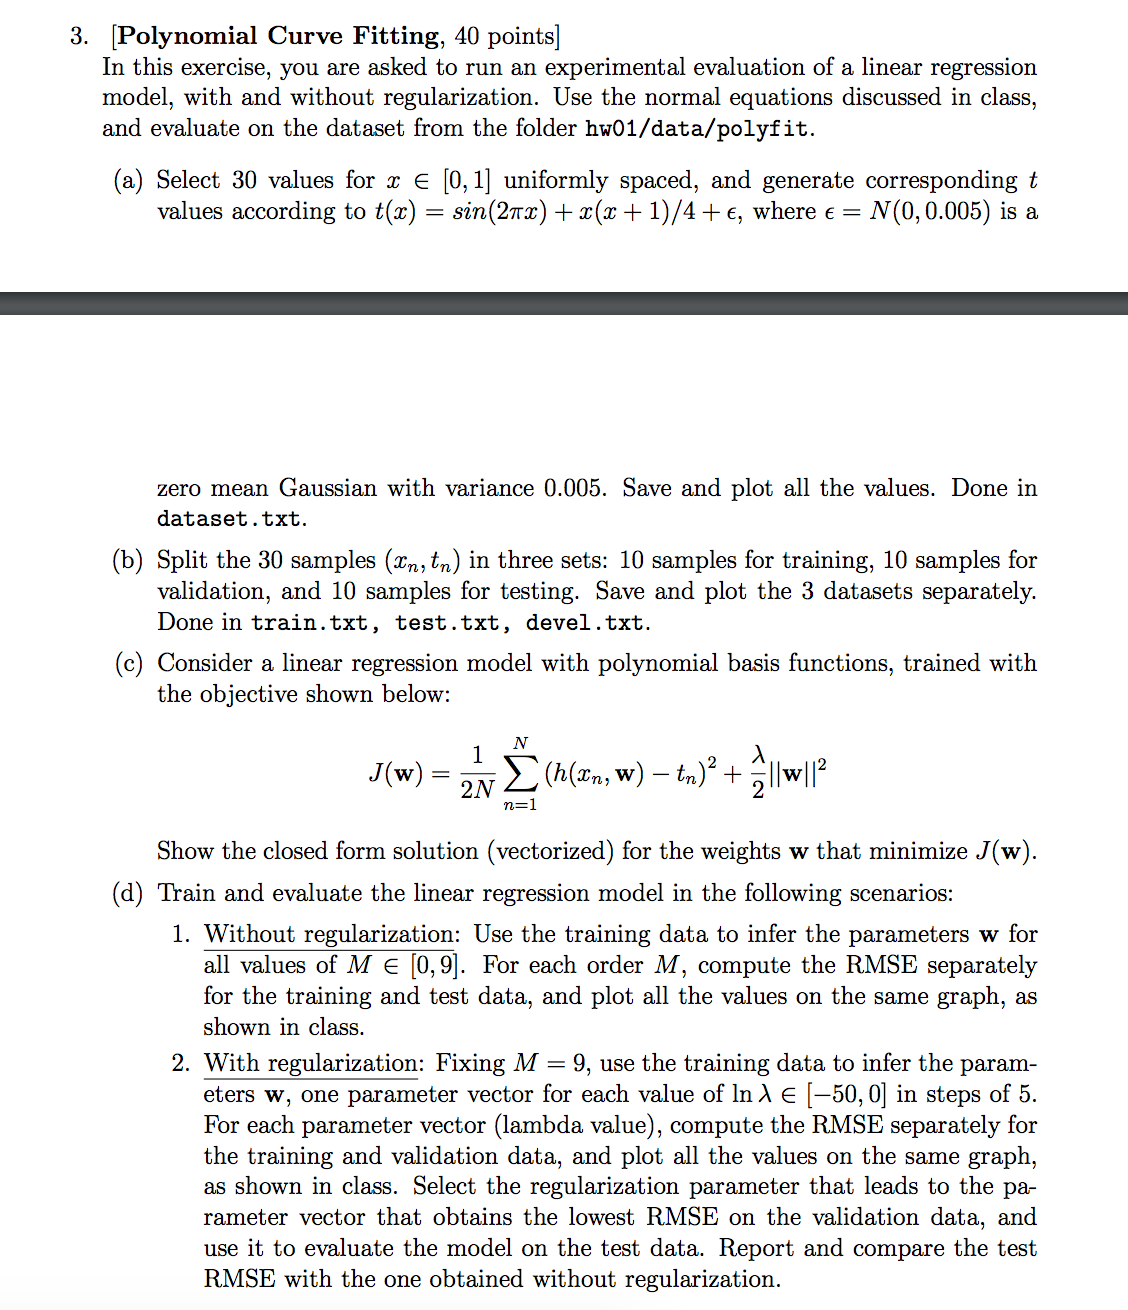

In [4]:
Image('images/hw01qn3.png')

In [ ]:
# %load polyfit.py
#!python
"""
:Title: Polynomial Regresssion with Ridge Regression.

@author: Bhishan Poudel

@date: Sep 22, 2017

@email: bhishanpdl@gmail.com

The cost function for the Ridge Regression is given by

.. math::

  J(w) = \\frac{1}{2N} \sum_{n=1}^N (h(x_n,w) - t_n)^2 + \
  \\frac{\lambda}{2} ||w||^2


Here, the first term is the half mean of the SSE.
And the second term is the shrinkage penalty.
The parameter :math:`\\lambda` is called shrinkage hyperparamter.
Since it is the hyperparamter we chose it from the validation set,
not from the train set.


The term :math:`||w||^2` is the L-2 regularizaton on the SSE term.
The square form is called Ridge Regression and the modulus form
:math:`|w|` is called Lasso Regresssion.


If we have both Lasso and Ridge regression it is called Elastic
Net Regression. Elastic Net Regression have the parameters:
:math:`\\lambda_1 ||w|| + \\lambda_2 ||w||^2`


If a group of predictors are highly correlated among themselves, LASSO
tends to pick only one of them and shrink the other to exact zero (or, very near to zero). 
Lasso can not do grouped selection and tends to choose only one variable.
It is good for eliminating trivial features but not good for grouped selection.
Lasso gives the sparse model and is computationally less expensive.


On the other hand, Ridge Regression penalize the term on the squares of the
magnitude. The weight are drawn near to zero but not exactly zero. This method
is computationally inefficient.

"""
# Imports
import argparse
import sys
import numpy as np
from matplotlib import pyplot as plt
from numpy.linalg import inv, norm
from numpy import sum, sqrt, array, log, exp
from numpy.core.umath_tests import inner1d
# from sklearn.metrics import mean_squared_error


# Read data matrix X and labels t from text file.
def read_data(infile):
    data = np.genfromtxt(infile, delimiter=None, dtype=np.double)
    X = data[:, :-1 ]
    t = data[:, [-1] ]

    #debug
    # print("X.shape = {}".format(X.shape))
    # print("t.shape = {}".format(t.shape))


    return X, t


def read_data_vander(infile, M):
    """Read the dataset and return vandermonde matrix Xvan for given degree M.

    This function returns vandermonde matrix of 1d array X.

    The vandermonde matrix will be of size len(X) * M.

    But here final Xvan will have shape sample * (degree+1)

    The first column of vandermonde matrix is all 1.

    The last column will be M-1 nth power of second column, NOT Mth power.

    The target t is of the size len(X)*1 i.e. N * 1 (N is sample size)

    Args:
      infile (str): input dataset text file, whitespace separated
      M (int): Degree of polynomial to fit

    .. note::

        Numpy vander function (Vandermonde Matrix).
        Refer `Numpy vander <https://docs.scipy.org/doc/numpy/reference/generated/numpy.vander.html>`_.

        Example::

            x = np.arange(1,6) # x must be 1d array
            x = np.array([1,2,3,4,5])
            xvan3 = np.vander(x, N=3,increasing=True)
            # shape of xvn is len(x) * degree
            # first column is all 1 and last power is excluded
            [[ 1  1  1]
            [ 1  2  4]
            [ 1  3  9]
            [ 1  4 16]
            [ 1  5 25]]

    .. note::

       Numpy array slicing::

        data     = np.arange(20).reshape((5,4))
        col0     = data[:, [0] ]
        col0_1   = data[:, [0,1]]
        col0_1a  = data[:, :2]
        not_col0 = data[:, 1:]
        not_last = data[:, :-1]

      """
    data = np.genfromtxt(infile, delimiter=None, dtype=np.double)
    X = data[:, :-1] # Design matrix X without t values of last column

    # Make the Vandermonde matrix from X
    # To use vandermonde X must be 1d array.
    # X[:, 0] is first column of input data X.
    Xvan = np.vander(X[:, 0], M + 1, increasing =True)
    t = data[:, [-1]]

    # debug
    print("X.shape = ", X.shape)       # sample, 1
    print("Xvan.shape = ", Xvan.shape) # sample, degree+1
    print("t.shape = ", t.shape)       # sample, 1

    return Xvan, t



def train(X, t):
    """Train the data and return the weights w.

    This model uses OLS method to train the data without the penalty term.

    .. math::

      J(w) = \\frac{1}{2N} \sum_{n=1}^N (h(x_n,w) - t_n)^2

    Args:

      X (array): Design matrix of size (m+1, n). I.e. There are
        m features and one bias column in the matrix X.

      t (column): target column vector

    .. note::

       Here the design matrix X should have one extra bias term.

    .. warning::

       The operator @ requires python >= 3.5

    .. note::

       Matrix properties.
       `Wikipedia <https://en.wikipedia.org/wiki/Matrix_multiplication>`_.

       .. math::

         AB \\neq  BA \\\\
         (AB)^T =  B^T A^T \\\\
         (AB)^{-1} =  B^{-1} A^{-1} \\\\
         tr(AB) =  tr(BA) \\\\
         det(AB) = det(A) det(B) = det(B) det(A) = det(BA)

    """
    # w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(t)
    w = (inv(X.T @ X))  @ (X.T @ t)

    # debug
    # print("X.shape = {}".format(X.shape))
    # print("t.shape = {}".format(t.shape))

    return w


def train_regularized(Xm1, t, lam, M):
    """Ridge Regularization (L2 normalization) with square penalty term.

    The cost function for ridge regularization is

    .. math::

      J(w) = \\frac{1}{2N} \sum_{n=1}^N (h(x_n,w) - t_n)^2 + \\frac{\lambda}{2} ||w||^2

    Minimizing cost function gives the weight vector w.
    Here :math:`\\lambda` is the hyperparameter chosen from validation set
    with lowest rmse for given values of degrees of polynomial. Different may
    give the same minimum rmse and we choose one of them.

    .. math::

      w = (\lambda N I) (X^T t)

    Args:

      Xm1 (array): Design matrix of size (m+1, n). I.e. There are
        m features and one bias column in the matrix X.

      t (column): Target column vector. :math:`\\alpha no space before last`

      lam (float): The hyperparameter :math:`\\alpha > \\beta` for the regularization.

      M (int): Degree of the polynomial to fit.

    .. note::

       Here the design matrix X should have one extra bias term.
       The function read_data_vander returns X with one extra

    .. warning::

       The operator @ requires python >= 3.5

    """
    # debug
    # Example M = 9, Xm1 has shape 10,10 and t has shape 10,1
    # print("Xm1.shape = {}".format(Xm1.shape))
    # print("t.shape = {}".format(t.shape))


    # First get the identity matrix of size deg+1 by deg+1
    N = len(t)
    I = np.eye(M + 1)

    # weight for ridge regression
    w_ridge = inv(lam * N * I + Xm1.T @ Xm1 )   @ (Xm1.T @ t)

    return w_ridge

# Compute RMSE on dataset (X, t).
def compute_rmse(X, t, w):
    """Compute the RMSE.

    RMSE is the root mean square error.

    .. math:: RMSE = \sqrt{\sum_{i=1}^{n}  \\frac{(h_i - t_i)^2}{n} }

    Here the hypothesis h is the matrix product of X and w.
    Hypothesis h should have the same dimension as target vector t.


    The norm of 1d vector can be calculated as given 
    in `Wikipedia Norm <https://en.wikipedia.org/wiki/Norm_(mathematics)>`_.

    :math:`||x|| = \sqrt{x_1^2 + x_2^2 + ... + x_n^2}`

    There are several methods to calculate hypothesis and norms.

    `Refer to stackoverflow <https://stackoverflow.com/questions/9171158/how-do-you-get-the-magnitude-of-a-vector-in-numpy>`_.


    Python codes to calculate norm of a 1d vector::

        import numpy as np
        from numpy.core.umath_tests import inner1d

        V = np.random.random_sample((10**6,3,)) # 1 million vectors
        A = np.sqrt(np.einsum('...i,...i', V, V))
        B = np.linalg.norm(V,axis=1)
        C = np.sqrt((V ** 2).sum(-1))
        D = np.sqrt((V*V).sum(axis=1))
        E = np.sqrt(inner1d(V,V))

        print [np.allclose(E,x) for x in [A,B,C,D]] # [True, True, True, True]

        import cProfile
        cProfile.run("np.sqrt(np.einsum('...i,...i', V, V))") # 3 function calls in 0.013 seconds
        cProfile.run('np.linalg.norm(V,axis=1)')              # 9 function calls in 0.029 seconds
        cProfile.run('np.sqrt((V ** 2).sum(-1))')             # 5 function calls in 0.028 seconds
        cProfile.run('np.sqrt((V*V).sum(axis=1))')            # 5 function calls in 0.027 seconds
        cProfile.run('np.sqrt(inner1d(V,V))')                 # 2 function calls in 0.009 seconds.
        # np.eisensum can also be written as
        # np.sqrt(np.einsum('ij,ij->i',a,a))
        # NOTE:
        # inner1d is ~3x faster than linalg.norm and a hair faster than einsum
        # For small data set ~1000 or less numpy is faster
        # a_norm = np.sqrt(a.dot(a)) is faster than np.sqrt(np.einsum('i,i', a, a))



    We can calculate hypothesis as:
    :math:`h = X @ w`


    Or, we may use:
    :math:`h = X .dot(w)`

    One of the fastest methods to calculate the hypothesis is the
    np.einsum method. The explanation of `einsum` is given below:


    For example::

      w     X      t
      2,1   10,2   10,1
      i,j   k, i   k,j

      h = np.einsum('ij,ki->kj', w, X) = X @ w

    To find the norm of the residual matrix h-t we may use
    the code::

      # Using np.linalg.norm
      ht_norm = np.linalg.norm(h - t)

      # inner1d is the faster than np.linalg.norm subroutine.
      from numpy.core.umath_tests import inner1d
      ht_norm = np.sqrt(inner1d(h-t,h-t))

    To calculate RMSE we can also use sklearn library::

      from sklearn.metrics import mean_squared_error
      rmse = mean_squared_error(h, t)**0.5

    """

    # # print("w.shape = {}, X.shape = {} t.shape = {}".format(w.shape,X.shape,t.shape))
    # h = X.dot(w)
    # h = X @ w
    h = np.einsum('ij,ki->kj', w, X)
    sse = (h - t) ** 2
    mse = np.mean(sse)
    rmse = np.sqrt(mse)

    # Method from sklearn
    # rmse = mean_squared_error(X@w, t)**0.5 # 7.10437e-04

    return np.double(rmse)

def myplot(X, t,label,style):
    # matplotlib customization
    plt.style.use('ggplot')
    fig, ax = plt.subplots()


    # plot with label, title
    ax.plot(X,t,style,label=label)

    # set xlabel and ylabel to AxisObject
    ax.set_xlabel('x')
    ax.set_ylabel('t')
    ax.set_title('Polynomial ' + label + ' data')
    ax.legend()
    ax.grid(True)
    plt.tight_layout()
    plt.savefig('images/hw01qn3_'+ label+'.png')
    plt.show()
    plt.close()

def plot_alldata():
    labels = ['dataset','devel','train','test']
    styles = ['ro','g^','bo','k>']
    for i, label in enumerate(labels):
        X, t = read_data('../data/polyfit/{}.txt'.format(label))
        myplot(X,t,label,styles[i])

def fit_unreg_poly(fh_train,fh_test,fh_valid,M):
    """Unregularized polynomial regression for degree 0 to 9.

    Here, the degree of the polynomial varies from 0-9.

    Args:
      fh_train (str): File path for train data
      fh_test (str): File path for test data
      fh_valid (str): File path for validation data

    Return: None

    """
    # Get Vandermonde matrix X and target t
    # First column is all 1 and shape of X is sample * deg+1
    # M = 9 X has 10 columns, with first column all ones.
    Xtrain, ttrain = read_data_vander(fh_train,M)
    Xtest, ttest   = read_data_vander(fh_test, M)
    Xvalid, tvalid = read_data_vander(fh_valid,M)

    # Look how they are
    # print("Xtrain = {}".format(Xtrain))
    # print("Xtrain.shape = {}".format(Xtrain.shape))
    # print("Xtrain[0] = {}".format(Xtrain[0]))


    # Values of degree of polynomials
    Mvals = np.arange(10)
    E_train, E_test = [], []

    for m in Mvals:

        # X values to use
        # XXX: Here inside for loop Xtrainm1 can not be written Xtrain
        # :, means all rows
        # 0:m+1 means columns 0 to m
        #
        # for loop m = 0 ... 9 we choose vandermonde matrix from above vander
        # matrix of degree 9.
        # Xtrain and Xtest both have 10 columns above for loop.
        Xtrainm1 = Xtrain[:, 0:m+1]
        Xtestm1  = Xtest[:, 0:m+1]

        # get weight w = (inv(X.T @ X))  @ (X.T @ t)
        #  w is a column vector of shape m+1, 1 (e.g. 10,1 for m=9 )
        w = train(Xtrainm1, ttrain)

        # get rmse = mean_squared_error(X@w, t)**0.5
        # NOTE:  h= X @ w
        # E = RMSE is scalar float number
        E1 = compute_rmse(Xtrainm1, ttrain, w)
        E2 = compute_rmse(Xtestm1, ttrain, w)

        # Append values to rmse list
        E_train = np.append(E_train, E1)
        E_test  = np.append(E_test, E2)

        # debug
        # print("\n")
        # print("#"*50)
        # print("degree = {}".format(m))
        # print("w.shape = {}".format(w.shape))
        # print("ttrain.shape = ", ttrain.shape)
        # print('Train RMSE = {:.5e}'.format(E1))

    # Elegant way of computing rmse for train and test
    # compute_rmse(X,t,w)
    # E_train = [compute_rmse( Xtrain[:, 0:m+1], ttrain, train(
    #                                                   Xtrain[:, 0:m+1], ttrain))
    #            for m in Mvals]
    #
    # E_test  = [compute_rmse(Xtest[:, 0:m+1],  ttrain, train(
    #                                                  Xtrain[:, 0:m+1], ttrain))
    #            for m in Mvals]

    # Plot unregularized polynomial regression
    plt.plot(Mvals, E_train, 'r-', label = "train")
    plt.plot(Mvals, E_test ,  'b--' , label = "test" )
    plt.xlabel("degree (M)")
    plt.ylabel("$E_{rms}$")
    plt.title("Unregularized Univariate Polynomial Regression")
    plt.legend()
    plt.savefig("images/unreg_poly_reg.png")
    plt.show()
    plt.close()

def fit_reg_poly(fh_train,fh_test,fh_valid):
    """Regularized polynomial with fixed degree M = 9.

    Here, ln lambda varies from -50 to 0 with step size 5.
    I.e. lamdda varies from exp(-50) to 1.

    We have to calculate weight vector w for each lambda.
    For degree M = 9, weight vector w has 10 elements.

    We also find RMSE for train and validation set for each lambda.
    Then we choose the hyperparameter lambda that gives the lowest
    RMSE on the validation set.

    Args:
      fh_train (str): File path for train data
      fh_test (str): File path for test data
      fh_valid (str): File path for validation data

    Return:
      lam_min_rmse_valid (float): The value of hyper parameter lambda
      that minimizes RMSE for the validation set.


    """
    # Degree of polynomial
    M = 9

    # Values of shrinkage hyperparameter lambda
    log_lambda_ridge = np.arange(-50, 0+5, 5)
    lambda_ridge = np.exp(log_lambda_ridge)

    # X,t for train,test and validation
    # vander gives bias term itself
    # Here, X matrix has M+1 columns. First column is all ones.
    Xtrain, ttrain = read_data_vander(fh_train,M)
    Xtest, ttest   = read_data_vander(fh_test, M)
    Xvalid, tvalid = read_data_vander(fh_valid,M)


    # Initiliaze rmse_train and rmse_validation
    E_train_ridge = []
    E_valid_ridge  = []
    for lam in lambda_ridge:

        # print("lam = {:.2e} log(lam) = {:.0f}".format(lam, np.log(lam)))
        # get w from training (note that we get lambda from validation)
        # w_ridge = inv(lam * N * I + Xm1.T @ Xm1 )   @ (Xm1.T @ t)
        w_ridge = train_regularized(Xtrain,ttrain,float(lam), M)

        # rmse for train and valid
        E1 = compute_rmse(Xtrain, ttrain, w_ridge)
        E2 = compute_rmse(Xvalid, tvalid, w_ridge)

        # Append rmse to the list
        E_train_ridge = np.append(E_train_ridge, E1)
        E_valid_ridge = np.append(E_valid_ridge, E2)

    print("\n")
    print("#"*60)
    print("Ridge Regression:")
    print("Degree of polynomial M = ", M)
    print('log(lam)   lam          E_train             E_valid')
    for i, lam in enumerate(lambda_ridge) :
        print(' {:.2f}   {:.5e} {:.14f}   {:.14f} '.format(
            np.log(lam), lam, E_train_ridge[i], E_valid_ridge[i] ))

    lam_min_rmse_valid_idx = np.where(E_valid_ridge == min(E_valid_ridge))[0]
    lam_min_rmse_valid_idx_last = lam_min_rmse_valid_idx[-1]
    idx = lam_min_rmse_valid_idx_last
    lam_min_rmse_valid = lambda_ridge[idx]
    print('-'*60)
    print("{}    {:.5e}                    {:.14f}".format(
        log(lambda_ridge[idx]), lam_min_rmse_valid, E_valid_ridge[idx]))

    # Plot
    plt.plot(log_lambda_ridge, E_train_ridge,
             color='r', marker='o', ls='-', label = "train")
    plt.plot(log_lambda_ridge, E_valid_ridge,
             color='b', marker= 'o', ls='--', label = "validation")
    plt.xlabel("log $\lambda$")
    plt.ylabel("$E_{rms}$")
    plt.title("Polynomial Regression Cross Validation")
    plt.legend()
    plt.savefig("images/reg_poly_reg.png")
    plt.show()
    plt.close()

    # Plot table
    fig, ax =plt.subplots()
    clust_data = np.array([log_lambda_ridge,lambda_ridge, E_train_ridge, E_valid_ridge]).T
    collabel=("log($\lambda$)", "$\lambda$", "$E_{train}$","$E_{valid}$")
    ax.axis('tight')
    ax.axis('off')
    the_table = ax.table(cellText=clust_data,colLabels=collabel,loc='center')
    ax.plot(clust_data[:,0],clust_data[:,1])
    plt.title('Choosing hyperparameter $\lambda$ ')
    plt.savefig('images/table_reg_poly_fitting.png')
    plt.show()
    plt.close()

    return lam_min_rmse_valid

def comparison(fh_train,fh_test,fh_valid, lam_min_rmse_valid,M):
    """Compare the unregularized and regularized polynomial regression.

    Here, we compare test RMSE with and without ridge regularization for
    9th degree univariate polynomial regression.

    While fitting test data with ridge regression, we use the hyper parameter
    lambda that gives the minimum rmse in the cross-validation set.

    Args:
      fh_train (str): File path for train data
      fh_test (str): File path for test data
      fh_valid (str): File path for validation data
      lam_min_rmse_valid (float): The hyperparameter lambda that gives minimum
      rmse on cross validation set.

    Return: None

    """
    print("\n")
    print('#'*50)
    print("Comparison of regularized and unregularized cases:")
    # print("lam_min_rmse_valid = {}".format(lam_min_rmse_valid))

    # Get X and t from dataset
    Xtrain, ttrain = read_data_vander(fh_train,M)
    Xtest, ttest   = read_data_vander(fh_test, M)
    Xvalid, tvalid = read_data_vander(fh_valid,M)

    # Unregularized
    w = train(Xtrain, ttrain)
    E_rms_test = compute_rmse(Xtest, ttest, w)
    print('Test RMSE without regularization for M = 9: %0.4f.' % E_rms_test)

    w_ridge = train_regularized(Xtrain,ttrain, float(lam_min_rmse_valid), M)
    E_rms_test = compute_rmse(Xtest, ttest, w_ridge)
    print('Test RMSE with    regularization for M = 9: %0.4f.' % E_rms_test)



##=======================================================================
## Main Program
##=======================================================================
def main():
    """Run main function."""
    parser = argparse.ArgumentParser('Univariate Exercise.')
    parser.add_argument('-i', '--input_data_dir',
                        type=str,
                        default='../data/polyfit',
                        help='Directory for the polyfit dataset.')
    FLAGS, unparsed = parser.parse_known_args()

    ##=======================================================================
    ## Part 3b: Plotting dataset
    ##=======================================================================
    # Plot dataset
    plot_alldata()

    ##=======================================================================
    ## Part 3d: Polynomial Univariate Ridge Regularization
    ##=======================================================================
    fh_train = FLAGS.input_data_dir + "/train.txt"
    fh_test = FLAGS.input_data_dir + "/test.txt"
    fh_valid = FLAGS.input_data_dir + "/devel.txt"

    # unregularized
    fit_unreg_poly(fh_train,fh_test,fh_valid,M=9)

    # regularized
    lam_min_rmse_valid = fit_reg_poly(fh_train,fh_test,fh_valid)

    # compare them
    comparison(fh_train,fh_test,fh_valid, lam_min_rmse_valid,M=9)

if __name__ == "__main__":
    import time

    # Beginning time
    program_begin_time = time.time()
    begin_ctime        = time.ctime()

    #  Run the main program
    main()


    # Print the time taken
    program_end_time = time.time()
    end_ctime        = time.ctime()
    seconds          = program_end_time - program_begin_time
    m, s             = divmod(seconds, 60)
    h, m             = divmod(m, 60)
    d, h             = divmod(h, 24)
    print("\nBegin time: ", begin_ctime)
    print("End   time: ", end_ctime, "\n")
    print("Time taken: {0: .0f} days, {1: .0f} hours, \
      {2: .0f} minutes, {3: f} seconds.".format(d, h, m, s))


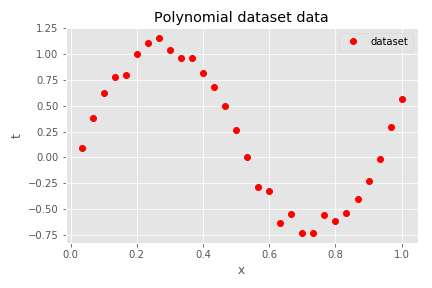

In [7]:
Image('images/hw01qn3_dataset.png')

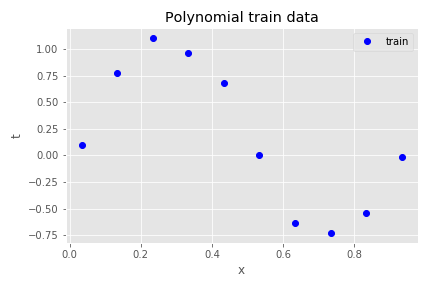

In [8]:
Image('images/hw01qn3_train.png')

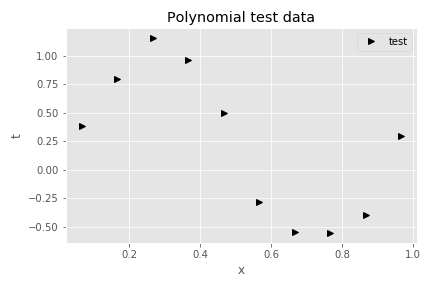

In [9]:
Image('images/hw01qn3_test.png')

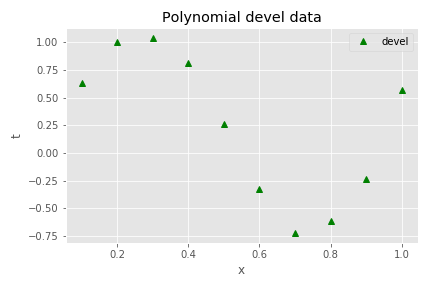

In [10]:
Image('images/hw01qn3_devel.png')

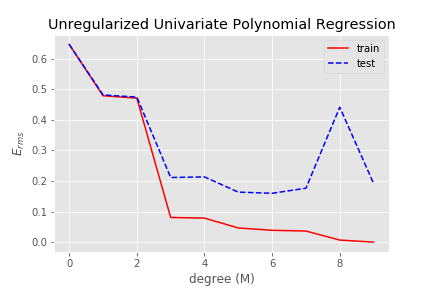

In [11]:
Image('images/unreg_poly_reg.png')

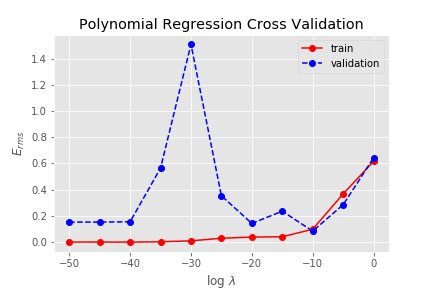

In [12]:
Image('images/reg_poly_reg.png')

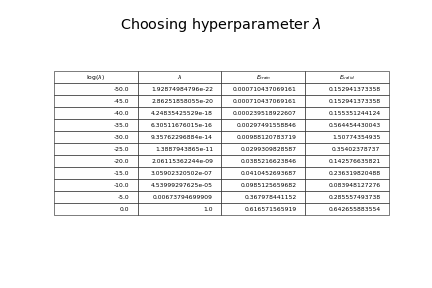

In [13]:
Image('images/table_reg_poly_fitting.png')